# Aplicando estilos a Matplotlib: Configuraciones y Stylesheets

Como ya te habrás fijado, cuando iniciamos los notebook solemos hacer 4 pasos, de los cuales hemos comentado todos menos este:
```Python
plt.style.use('classic')
```

Donde ``'classic'`` es un parámetro que hemos ido cambiando en diferentes notebooks.

Pues este comando nos sirve para cambiar el estilo de las visualizaciones, es decir, las opciones de configuración en tiempo de ejecución (rc) de Matplotlib, que bñasicamente son opciones extra que no hemos visto hasta ahora, como añadir cuadrículas, cambiar el color del fondo... Es decir, no solamente podremos editar las propiedades básicas de las gráficas que hemos ido viendo hasta ahora en los notebooks (como cambiar colores o tamaños de líneas), sino que podremos ir mucho más allá, haciendo que las posibilidades de personalización crezcan notablemente...


Además, veremos que un estilo tiene predefinidos ciertos de estos parámetros de configuración, lo que hace que podamos seleccionar inicialmente un estilo, y se apliquen todos estos de forma predeterminada, en el caso de que no se le especifique nada en concreto. Existen varios estilos ya preconfigurados en Matplotlib, como veremos más adelante.

## Visualizaciones a mano

A lo largo de los notebooks, hemos visto que es posible modificar la configuración de cada gráfica de modo individual para conseguir una visualización con mejores características que el estilo predeterminado, puediendo hacer también personalizaciones de algo que no se establezca en la propia función de representación.

Por ejemplo, comencemos con una visualización simple de un histograma bastante normalito:

In [64]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
%matplotlib inline

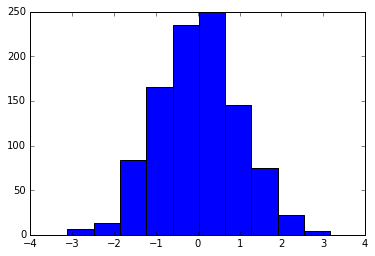

In [65]:
x = np.random.randn(1000)
plt.hist(x);

Como habíamos dicho, es bastante sencillito, por lo que hagamos algo a mano para mejorar esta visualización, tanto a nivel función como algo externo a ella:

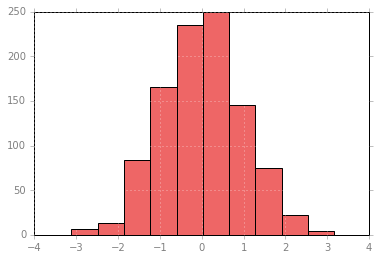

In [72]:
fig, ax = plt.subplots()

# Añadimos gráfica con colores:
ax.hist(x, color='#EE6666');

# Añadimos rejilla:
ax.grid(color='white')
   
# Ahora modificamos algo externo, como son los ejes (añadiendo la rejilla):
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')


Como podemos ver, queda más bonito, pero si tuviéramos que hacer todo esto para todas y cada una de las gráficas que representemos en el notebook, podemos acabar volviéndonos locos.

Así que necesitaremos hacer algo para no perder un montón de tiempo con cada representación. Por suerte, hay una forma de seleccionar estas configuraciones solo una vez y que se mantengan para el resto de las gráficas.

## Cambiando los parámetros por defecto: ``rcParams``

Cada vez que se carga Matplotlib, se define una configuración en tiempo de ejecución (rc) que contiene los estilos predeterminados para cada visualización que creemos. Esta configuración se puede ajustar en cualquier momento utilizando `` plt.rc ``.

A continuación, configuraremos los parámetros ``rc`` para que nuestro gráfico predeterminado sea similar a lo que acabamos de hacer. Para ello, comenzaremos guardando una copia del diccionario `` rcParams `` actual, para que podamos restablecer fácilmente estos cambios en la sesión actual:

In [73]:
IPython_default = plt.rcParams.copy()

Ahora ya podemos usar la función ``plt.rc`` para cambiar alguna de estas configuraciones:

In [6]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

Con estas opciones configuradas, todas las gráficas que creemos ahora utilizarán estos valores por defecto:

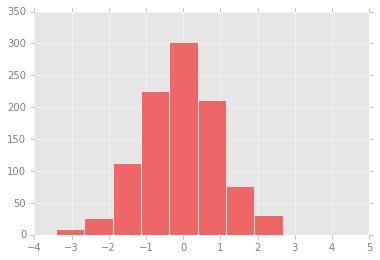

In [7]:
plt.hist(x);

Veamos cómo se ve un gráfico con varias líneas con estos parámetros rc:

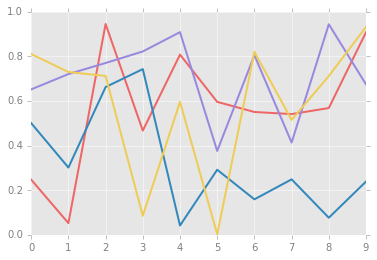

In [8]:
for i in range(4):
    plt.plot(np.random.rand(10))

Si nos gusta cómo nos ha quedado esta configuración, podríamos guardarlas en un archivo *.matplotlibrc*, el cual debe tener un formato que podemos leer en la [documentación de Matplotlib] (http://Matplotlib.org/users/customizing.html).

Sin embargo, podemos usar las *stylesheets*, que nos permitirán utilizar los estilos predeterminados de Matplotlib.

## Stylesheets

La versión 1.4 de Matplotlib en agosto de 2014 añadió el módulo ``style``, que incluye una serie de nuevas *stylesheets* predeterminadas, así como la capacidad de crear y empaquetar estilos propios. Estas hojas de estilo tienen un formato similar a los archivos *.matplotlibrc* mencionados anteriormente, pero deben tener una extensión *.mplstyle*.

Incluso si no definimos nuestros propios estilos, las stylesheets incluidas de forma predeterminada son extremadamente útiles.
Los estilos disponibles se enumeran en `` plt.style.available ``, de los cuales veremos algunos de ellos:

In [74]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

La forma principal de cambiar el estilo del notebook es con la sentencia que hemos utilizado al comienzo de este notebook:

``` python
plt.style.use('stylename')
```

OJO, esto cambiará el estilo para todas y cada una de las gráficas, salvo que le especifiquemos lo contrario. Alternativamente, si sólo quisiéramos utilizar el estilo para una gráfica en concreto, podríamos usar la siguiente sintaxis:

``` python
with plt.style.context('stylename'):
    make_a_plot()
```


Para seguir con el notebook, donde veremos diferentes estilos, nos crearemos una función para hacernos 2 gráficas sobre las que ver cómo afecta el estilo en concreto. En este caso, las gráficas serán un histograma y un gráfico de varias líneas:

In [10]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

### Estilo Default

El estilo "default" es el que hemos estado viendo mayormente a lo largo de los notebooks, así que comenzaremos por él.

Primero, reiniciaremos nuestra configuración en tiempo de ejecución a la configuración por defecto del notebook:

In [11]:
# reset rcParams
plt.rcParams.update(IPython_default);

C:\Users\TheBridge\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The datapath rcparam was deprecated in Matplotlib 3.2.1 and will be removed two minor releases later.
  self[key] = other[key]
C:\Users\TheBridge\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\TheBridge\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\TheBridge\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\TheBridge\anaconda3\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3

Y lo aplicamos:

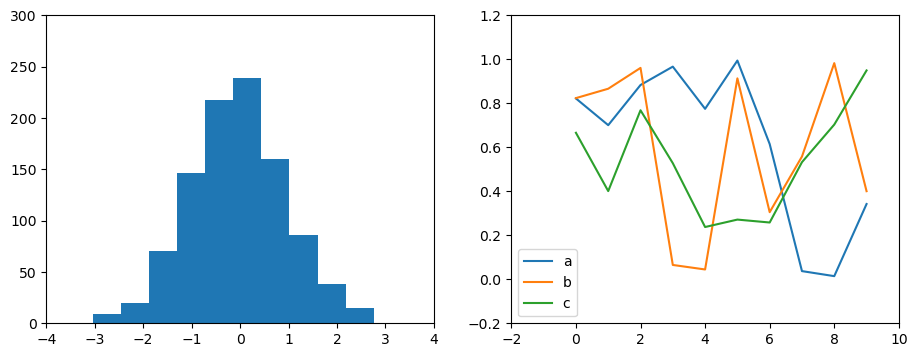

In [75]:
with plt.style.context('default'):
    hist_and_lines()

### Estilo FiveThiryEight

El estilo ``fivethirtyeight`` imita los gráficos que se encuentran en el popular website [FiveThirtyEight] (https://fivethirtyeight.com).
Como ceremos a continuación, se caracteriza por colores llamativos, líneas gruesas y ejes transparentes:

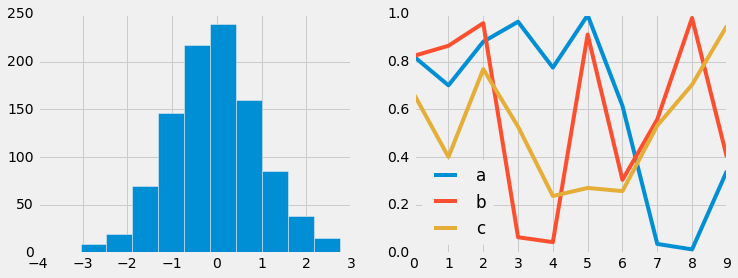

In [13]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

### Estilo ggplot

El paquete de R ``ggplot`` es una herramienta de visualización muy popular. El estilo de Matplotlib ``ggplot`` imita los estilos predeterminados de este paquete:

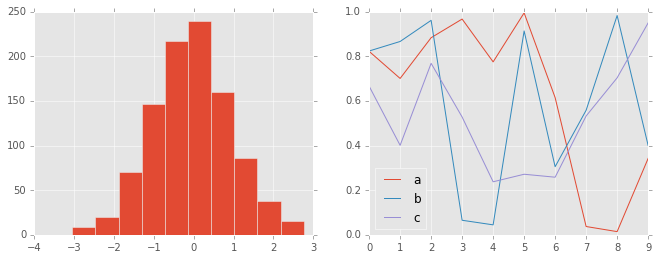

In [14]:
with plt.style.context('ggplot'):
    hist_and_lines()

### *Bayesian Methods for Hackers( style

Existe un libro en línea bastante bueno llamado [Bayesian Methods for Hackers](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/); en el que se presentan figuras creadas con Matplotlib, basándose en un buen conjunto de parámetros rc para crear un estilo consistente y visualmente atractivo en todo el libro.

En la stylesheet ``bmh`` se reproduce el estilo que se lleva a lo largo del libro.

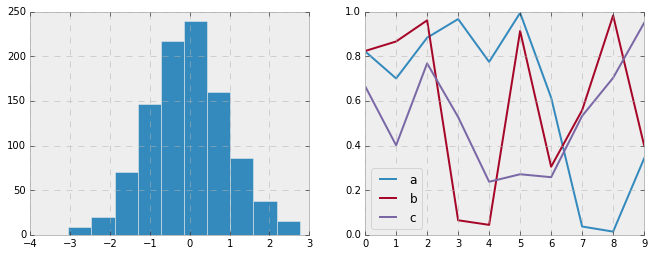

In [15]:
with plt.style.context('bmh'):
    hist_and_lines()

### Estilo Dark background

Para las figuras utilizadas en presentaciones, suele ser útil tener un fondo oscuro en lugar de uno claro. El estilo `` dark_background `` nos permite hacerlo:

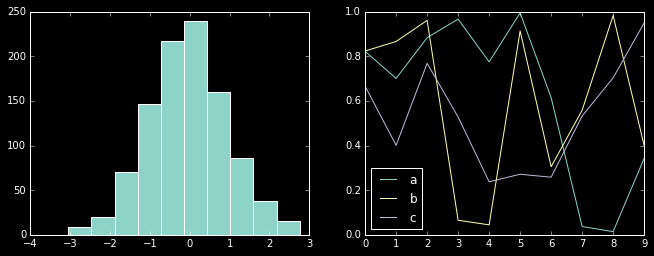

In [16]:
with plt.style.context('dark_background'):
    hist_and_lines()

### Estilo Grayscale

A veces, es posible que nos encontremos preparando figuras para una publicación impresa que no acepta figuras en color.
Para ello, el estilo `` escala de grises ``, que se muestra a continuación, puede resultar muy útil:

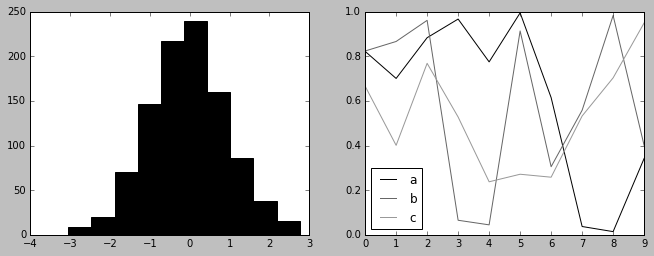

In [17]:
with plt.style.context('grayscale'):
    hist_and_lines()

### Estilo Seaborn

Matplotlib también tiene stylesheets inspiradas en la biblioteca Seaborn (que veremos más adelante), las cuales son muy interesantes para la exploración de datos. Las stylesheets basadas en Seaborn son varias, las cuales podremos consultar en la documentación comentada al principio de este notebook.

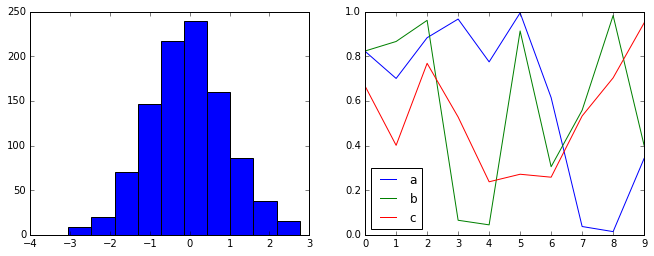

In [18]:
import seaborn
hist_and_lines()

## Estilo XKDC

Finalmente, como curiosidad, resulta interesante destacar que Matplotlib también integra un estilo basado en [XKDC](https://xkcd.com/), otro website muy popular, solo que en este caso no es una stylesheet, sino que se ha de llamar de otra forma:

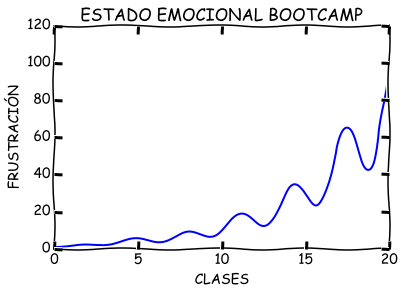

In [63]:
with plt.xkcd():
    x_axis = np.linspace(-0, 20, 5000)
    y_axis = np.exp(x_axis/5)*np.sin(-(1)*x_axis)**2 + np.exp(x_axis/5)
    plt.plot(x_axis, y_axis)
    plt.xlabel('CLASES')
    plt.ylabel('FRUSTRACIÓN')
    plt.title('ESTADO EMOCIONAL BOOTCAMP')
    plt.show()

## EXTRA

1. Coge alguno de los ejercicios que hayas hecho en otros notebook y prueba a ver qué ocurre cambiándole las stylesheets
2. Prueba a modificar el ``rc`` hasta conseguir un estilo que te guste o trata de imitar alguno de los que ya existen para aprender a manejarte con estos objetos
3. Hazlo también con el estilo XKDC y añádele algún texto